In [1]:
%%capture
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%capture
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

class SimpleConfig(mrcnn.config.Config):
    NAME = "coco_inference"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = len(CLASS_NAMES)

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

model.load_weights("/home/kabilan/Desktop/caption/dataset/mask_rcnn_coco.h5", by_name=True)

2022-04-29 10:26:19.723929: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-29 10:26:25.119572: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-29 10:26:25.119631: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kabilan-pt4987): /proc/driver/nvidia/version does not exist
2022-04-29 10:26:25.121320: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-04-29 10:26:25.157230: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2599990000 Hz
2022-04-29 10:26:25.158349: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562d42d91220 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-04-29

In [3]:
def get_objects_and_locations(image_path):
    image = cv2.imread(image_path,1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rois = model.detect([image], verbose=0)[0]
    return rois

In [4]:
img_path = "/home/kabilan/Desktop/caption/dataset/images/10815824_2997e03d76.jpg"

In [28]:
image = cv2.imread(img_path,1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
res = get_objects_and_locations(img_path)

In [7]:
res

{'rois': array([[ 44,  12, 309, 260],
        [ 53, 235, 317, 319],
        [ 51, 377, 156, 416],
        [ 68, 409, 153, 500],
        [ 70, 399,  90, 405],
        [203, 309, 333, 498],
        [134, 364, 145, 384]], dtype=int32),
 'class_ids': array([18,  1,  1, 18, 28, 59, 17], dtype=int32),
 'scores': array([0.9999087 , 0.99982315, 0.9997403 , 0.9992543 , 0.894596  ,
        0.7837069 , 0.7242952 ], dtype=float32),
 'masks': array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [Fals

In [22]:
class Node:
    def __init__(self,start,end,class_id,class_name):
        self.start = start
        self.end = end
        self.class_id = class_id
        self.class_name = class_name

In [24]:
objects = []

In [25]:
for i in range(len(res['rois'])):
    class_name = CLASS_NAMES[res['class_ids'][i]]
    class_id = res['class_ids'][i]
    points = res['rois'][i]
    start = (points[1],points[0])
    end = (points[3],points[2])
    ob = Node(start,end,class_id,class_name)
    objects.append(ob)
    

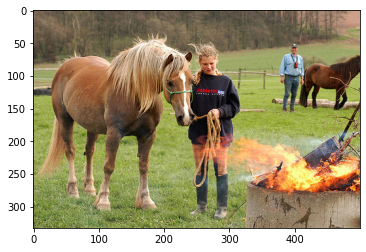

In [29]:
plt.imshow(image)

In [39]:
for each in objects:
    print(each.__dict__)

{'start': (12, 44), 'end': (260, 309), 'class_id': 18, 'class_name': 'horse'}
{'start': (235, 53), 'end': (319, 317), 'class_id': 1, 'class_name': 'person'}
{'start': (377, 51), 'end': (416, 156), 'class_id': 1, 'class_name': 'person'}
{'start': (409, 68), 'end': (500, 153), 'class_id': 18, 'class_name': 'horse'}
{'start': (399, 70), 'end': (405, 90), 'class_id': 28, 'class_name': 'tie'}
{'start': (309, 203), 'end': (498, 333), 'class_id': 59, 'class_name': 'potted plant'}
{'start': (364, 134), 'end': (384, 145), 'class_id': 17, 'class_name': 'dog'}


In [41]:
dist = np.linalg.norm(np.array(objects[0].end) - np.array(objects[1].end))
print(dist)

59.53990258641679


0.0